In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

ratings_fin_data= pickle.load(open("ratings_AND_fin_data_ebit_ebitda_div_profit.p","rb"))
# Note- I think initial ratings go back to 2011
ratings_fin_data.head()

ticker             Name       Sector         company  \
0    MMM       3M Company  Industrials              3M   
1    MMM       3M Company  Industrials              3M   
2    MMM       3M Company  Industrials              3M   
3    MMM       3M Company  Industrials              3M   
4    AOS  A.O. Smith Corp  Industrials  Smith A O Corp   

  financial year end (month) industry code   indicator Q1-2009 Q2-2009  \
0                         12        100001        EBIT     803    1191   
1                         12        100001      EBITDA  1074.0  1489.0   
2                         12        100001  Net Profit     518     783   
3                         12        100001   Dividends    -354    -355   
4                         12        100001        EBIT      16      33   

  Q3-2009       ...       Q1-2017 Q2-2017 Q3-2017 Q4-2017 Q1-2018 Q2-2018  \
0    1478       ...          1713    1723    2041    1757     983     NaN   
1  1768.0       ...        2151.0  2103.0  2418.0  2106.0  1365.0     NaN   
2     957       ...          1323    1583    1429     523     602     NaN   
3    -361       ...          -702    -701    -701    -699    -810     NaN   
4      46       ...           NaN     128     130     143     128     NaN   

  Q3-2018 missing data points (source) start date for uninterrupted values  \
0     NaN                            0                             Q1-2008   
1     NaN                            0                             Q3-2008   
2     NaN                            0                             Q1-2008   
3     NaN                            0                             Q3-2008   
4     NaN                            0                             Q1-2009   

  company_ratings  
0             4.1  
1             4.1  
2             4.1  
3             4.1  
4             3.9  

[5 rows x 49 columns]

In [21]:
ticker_ratings_df = pd.DataFrame()
ticker_ratings_df["ticker"]  =  ratings_fin_data["ticker"]
ticker_ratings_df["company_ratings"] = ratings_fin_data["company_ratings"]
ticker_ratings_df.drop_duplicates().reset_index()



index ticker company_ratings
0        0    MMM             4.1
1        4    AOS             3.9
2        8    ABT             4.1
3       12   ABBV             4.0
4       16    ACN             4.0
5       20   ATVI             3.8
6       24    AYI             3.6
7       28   ADBE             4.3
8       32    AAP             3.5
9       36    AMD             3.8
10      40    AES             4.1
11      44    AET             3.8
12      48    AMG             3.0
13      52    AFL             3.6
14      56      A             4.2
15      60    APD             3.9
16      64   AKAM             4.1
17      68    ALK             4.1
18      72    ALB             3.3
19      76    ARE             4.0
20      80   ALXN             3.4
21      84   ALGN             4.1
22      88   ALLE             3.8
23      92    AGN             3.8
24     100    ADS             3.8
25     104    LNT             3.4
26     108    ALL             3.8
27     112  GOOGL             3.8
28     113   GOOG             3.8
29     121     MO             4.2
..     ...    ...             ...
475   1855   VRTX             3.9
476   1859   VIAB             4.1
477   1863      V             4.0
478   1867    VNO             4.1
479   1871    VMC             3.7
480   1875    WMT             3.6
481   1879    WBA             3.5
482   1883     WM             3.5
483   1887    WAT             3.6
484   1891    WEC             3.8
485   1895    WFC             3.8
486   1899   WELL             4.0
487   1900    WDC             3.9
488   1904     WU             NaN
489   1908    WRK             3.4
490   1912     WY             3.9
491   1916    WHR             4.0
492   1920    WMB             NaN
493   1924   WLTW             3.8
494   1928    WYN             3.7
495   1932   WYNN             NaN
496   1936    XEL             3.7
497   1940    XRX             3.4
498   1944   XLNX             3.9
499   1948     XL             3.9
500   1949    XYL             3.6
501   1953    YUM             3.9
502   1957    ZBH             NaN
503   1961   ZION             3.7
504   1965    ZTS             3.7

[505 rows x 3 columns]

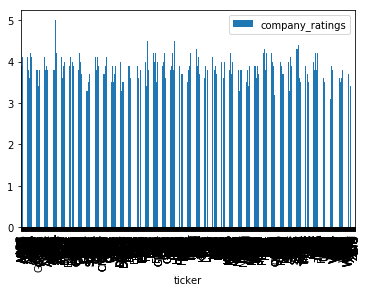

In [25]:
# Barplot of ratings by company, not super informative
# though one interesting really high outlier

ticker_ratings_df.dtypes
ticker_ratings_df["company_ratings"] = ticker_ratings_df["company_ratings"].apply(pd.to_numeric)

ticker_ratings_df.plot.bar(x = "ticker" , y= "company_ratings")





In [26]:
high_scores = ticker_ratings_df[ticker_ratings_df["company_ratings"] >4.5]
print(high_scores)
# kind of weird when double checking...

    ticker  company_ratings
205    AIV              5.0
206    AIV              5.0
207    AIV              5.0
208    AIV              5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1226ca518>]], dtype=object)

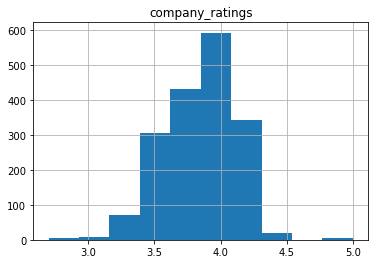

In [27]:
ticker_ratings_df.hist()

drop_dup_tick_ratings= ticker_ratings_df.drop_duplicates().reset_index()
# maybe normally distributed?
# or skewed, yea, seems skewed, leftward
# lots of responses in the 3.4/3.5/.6 range- cutoff around 4.3?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1217be240>]], dtype=object)

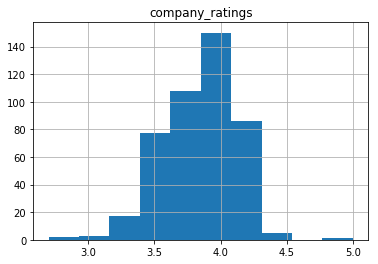

In [33]:
# previous hist forgot to drop duplicates
drop_dup_tick_ratings= ticker_ratings_df.drop_duplicates().reset_index()
drop_dup_tick_ratings.hist(column = "company_ratings", bins = 10)

# may want to transform?

In [38]:
# calculate % increase as (ym1-y0)/ym1
import numpy as np
def percent_change(curr_year, last_year):
    if last_year == 0:
        return 0          # could also do a try with, else  thing here
    ans = ((curr_year-last_year)/last_year)
    return ans

# convert relevant columns to numeric
ratings_fin_data["Q1-2017"] = ratings_fin_data["Q1-2017"].apply(pd.to_numeric)
ratings_fin_data["Q1-2018"] = ratings_fin_data["Q1-2018"].apply(pd.to_numeric)


#attempt to vectorize, following below
# https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column/19976286
ratings_fin_data["percent_increase_2017Q1-2018Q1"] =np.vectorize(percent_change)(
    ratings_fin_data["Q1-2017"],ratings_fin_data["Q1-2018"]) 




In [40]:
print(ratings_fin_data.head())
print(ratings_fin_data.tail())

  ticker             Name       Sector         company  \
0    MMM       3M Company  Industrials              3M   
1    MMM       3M Company  Industrials              3M   
2    MMM       3M Company  Industrials              3M   
3    MMM       3M Company  Industrials              3M   
4    AOS  A.O. Smith Corp  Industrials  Smith A O Corp   

  financial year end (month) industry code   indicator Q1-2009 Q2-2009  \
0                         12        100001        EBIT     803    1191   
1                         12        100001      EBITDA  1074.0  1489.0   
2                         12        100001  Net Profit     518     783   
3                         12        100001   Dividends    -354    -355   
4                         12        100001        EBIT      16      33   

  Q3-2009              ...               Q2-2017 Q3-2017 Q4-2017 Q1-2018  \
0    1478              ...                  1723    2041    1757   983.0   
1  1768.0              ...                2103.0  2418

In [44]:
#filter only for profit data
ratings_fin_data_profit_increase_only = ratings_fin_data[ratings_fin_data["indicator"] =="Net Profit"]

 
#ratings_fin_data.hist(columns = "percent_increase_2017Q1-2018Q1")

ticker                                 Name                      Sector  \
2       MMM                           3M Company                 Industrials   
6       AOS                      A.O. Smith Corp                 Industrials   
10      ABT                  Abbott Laboratories                 Health Care   
14     ABBV                          AbbVie Inc.                 Health Care   
18      ACN                        Accenture plc      Information Technology   
22     ATVI                  Activision Blizzard      Information Technology   
26      AYI                    Acuity Brands Inc                 Industrials   
30     ADBE                    Adobe Systems Inc      Information Technology   
34      AAP                   Advance Auto Parts      Consumer Discretionary   
38      AMD           Advanced Micro Devices Inc      Information Technology   
42      AES                             AES Corp                   Utilities   
46      AET                            Aetna Inc                 Health Care   
50      AMG        Affiliated Managers Group Inc                  Financials   
54      AFL                            AFLAC Inc                  Financials   
58        A             Agilent Technologies Inc                 Health Care   
62      APD         Air Products & Chemicals Inc                   Materials   
66     AKAM              Akamai Technologies Inc      Information Technology   
70      ALK                 Alaska Air Group Inc                 Industrials   
74      ALB                       Albemarle Corp                   Materials   
78      ARE  Alexandria Real Estate Equities Inc                 Real Estate   
82     ALXN              Alexion Pharmaceuticals                 Health Care   
86     ALGN                     Align Technology                 Health Care   
90     ALLE                             Allegion                 Industrials   
94      AGN                        Allergan, Plc                 Health Care   
98      AGN                        Allergan, Plc                 Health Care   
102     ADS                Alliance Data Systems      Information Technology   
106     LNT                  Alliant Energy Corp                   Utilities   
110     ALL                        Allstate Corp                  Financials   
115    GOOG                 Alphabet Inc Class C      Information Technology   
119    GOOG                 Alphabet Inc Class C      Information Technology   
...     ...                                  ...                         ...   
1849   VRSK                     Verisk Analytics                 Industrials   
1853     VZ               Verizon Communications  Telecommunication Services   
1857   VRTX           Vertex Pharmaceuticals Inc                 Health Care   
1861   VIAB                          Viacom Inc.      Consumer Discretionary   
1865      V                            Visa Inc.      Information Technology   
1869    VNO                 Vornado Realty Trust                 Real Estate   
1873    VMC                     Vulcan Materials                   Materials   
1877    WMT                      Wal-Mart Stores            Consumer Staples   
1881    WBA             Walgreens Boots Alliance            Consumer Staples   
1885     WM                Waste Management Inc.                 Industrials   
1889    WAT                   Waters Corporation                 Health Care   
1893    WEC                 Wec Energy Group Inc                   Utilities   
1897    WFC                          Wells Fargo                  Financials   
1902    WDC                      Western Digital      Information Technology   
1906     WU                     Western Union Co      Information Technology   
1910    WRK                     WestRock Company                   Materials   
1914     WY                   Weyerhaeuser Corp.                 Real Estate   
1918    WHR                      Whirlpool Corp.      Consumer Discretionary   
1922 

In [47]:
#check for null values
print(ratings_fin_data_profit_increase_only["Q1-2017"].isnull().sum() )
print(ratings_fin_data_profit_increase_only["Q1-2018"].isnull().sum())
print (ratings_fin_data_profit_increase_only["percent_increase_2017Q1-2018Q1"].isnull().sum())
# null vals for above
#166
#269
#351
#Why aren't these nulls adding up?
# some overlap?

166
269
351


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1200a6358>]], dtype=object)

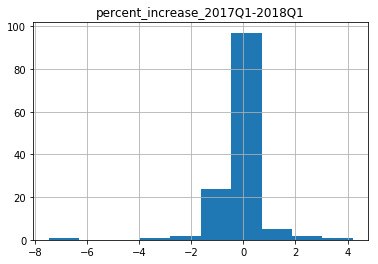

In [49]:
ratings_fin_data_profit_increase_only.hist(column = "percent_increase_2017Q1-2018Q1")


In [60]:
df_for_correlation_year_profit_ratings = pd.DataFrame()
df_for_correlation_year_profit_ratings["percent_increase"] = ratings_fin_data_profit_increase_only["percent_increase_2017Q1-2018Q1"]
df_for_correlation_year_profit_ratings["company_ratings"] = ratings_fin_data_profit_increase_only["company_ratings"].apply(pd.to_numeric)
df_for_correlation_year_profit_ratings.corr()

percent_increase  company_ratings
percent_increase          1.000000        -0.004186
company_ratings          -0.004186         1.000000

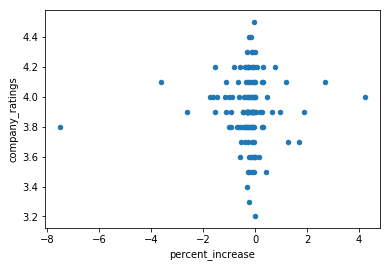

In [61]:
df_for_correlation_year_profit_ratings.plot.scatter(x = "percent_increase", y = "company_ratings")

In [58]:
def list_nulls_year(year_s, df):
    null_dict = {}
    for i in range(1,5):
        q = "Q{}-".format(i)
        qyear = q+year_s
        nulls = df[qyear].isnull().sum()
        null_dict[qyear] = nulls
        
    return(null_dict)

def list_nulls_2018(year_s, df):  #special bc no q4
    null_dict = {}
    for i in range(1,4):
        q = "Q{}-".format(i)
        qyear = q+year_s
        nulls = df[qyear].isnull().sum()
        null_dict[qyear] = nulls
    return(null_dict)
    
null_16 = list_nulls_year("2016",ratings_fin_data_profit_increase_only)
print(null_16)

null_17 = list_nulls_year("2017",ratings_fin_data_profit_increase_only)
print(null_17)

null_18 = list_nulls_2018("2018",ratings_fin_data_profit_increase_only)
print(null_18)

        
        
# looking at the lists of Nulls, a time span with low potential nulls relative to the group
# is Q2 2016 to Q2 2017

{'Q2-2016': 92, 'Q1-2016': 81, 'Q3-2016': 114, 'Q4-2016': 28}
{'Q3-2017': 76, 'Q4-2017': 155, 'Q2-2017': 65, 'Q1-2017': 166}
{'Q1-2018': 269, 'Q2-2018': 470, 'Q3-2018': 481}


In [62]:
# Think about partialing out variance in price due to overall market trends...
# https://www.marketwatch.com/investing/index/spx/historical

# try a regression on:  
from sklearn.linear_model import LinearRegression

lr_ratings_pred_prof = LinearRegression()

In [95]:
df_for_reg = pd.DataFrame()
df_for_reg["company_ratings"] = df_for_correlation_year_profit_ratings["company_ratings"]
df_for_reg["percent_increase"] = df_for_correlation_year_profit_ratings["percent_increase"]

df_for_reg.reset_index()

df_for_reg = df_for_reg.dropna().reset_index().transpose()
print(df_for_reg)


matrix_for_reg      = df_for_reg.as_matrix(columns=df_for_reg.columns[1:])

ratings       = matrix_for_reg[1]
profit_change = matrix_for_reg[2]

ratings = ratings.reshape(-1,1)
profit = profit_change.reshape(-1,1)

print(ratings, profit)

# below: predictors, values
lr_ratings_pred_prof.fit(ratings,
                   profit_change )


                       0          1          2       3          4    \
index             2.000000  10.000000  18.000000  22.000  26.000000   
company_ratings   4.100000   4.100000   4.000000   3.800   3.600000   
percent_increase  1.197674   0.002392  -0.105966  -0.148   0.140845   

                        5          6       7          8           9    \
index             30.000000  54.000000  58.000  82.000000  110.000000   
company_ratings    4.300000   3.600000   4.200   3.400000    3.800000   
percent_increase  -0.317324  -0.174338  -1.525  -0.317269   -0.295983   

                     ...               114          115          116  \
index                ...       1779.000000  1805.000000  1809.000000   
company_ratings      ...          3.800000     3.600000     3.900000   
percent_increase     ...         -0.636419    -0.234133    -0.133086   

                          117          118          119          120  \
index             1825.000000  1837.000000  1845.000000  1865

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
#
r_squared = lr_ratings_pred_prof.score(ratings,
                   profit_change )

print(r_squared)

0.000176864953725
